In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

[[ 1.73244925e+02  4.20227313e+02]
 [ 3.08509113e+02  5.34450405e+02]
 [ 3.88164691e+02  5.22426921e+02]
 [ 4.21229270e+02  7.28329074e+02]
 [ 5.39961168e+02  7.58387783e+02]
 [ 8.18004221e+02  5.38959211e+02]
 [ 9.56274280e+02  5.88556080e+02]
 [ 8.45057058e+02  3.85659798e+02]
 [ 8.85636315e+02  3.33057058e+02]
 [ 9.32227313e+02  1.79757646e+02]
 [ 8.91648056e+02  1.54207743e+02]
 [ 8.69104025e+02  1.79757646e+02]
 [ 8.46559994e+02  2.06810483e+02]
 [ 7.66904417e+02  3.36062929e+02]
 [ 4.73832010e+02  2.53401481e+02]
 [ 4.24235141e+02  2.41377998e+02]
 [ 4.48282107e+02  2.20336902e+02]
 [ 7.14301677e+02  1.57213614e+02]
 [ 7.32336902e+02  1.46693066e+02]
 [ 9.93847665e+02  9.55932620e+01]
 [ 9.74309505e+02  7.00433598e+01]
 [ 9.38239055e+02  1.03107939e+02]
 [ 9.29221442e+02  8.65756494e+01]
 [ 9.42747861e+02  2.94641034e+01]
 [ 9.39741990e+02  1.89435555e+01]
 [ 9.05174475e+02  1.59376847e+01]
 [ 9.35233184e+02  2.41126588e+00]
 [ 9.56274280e+02  2.41126588e+00]
 [ 9.84830053e+02  3

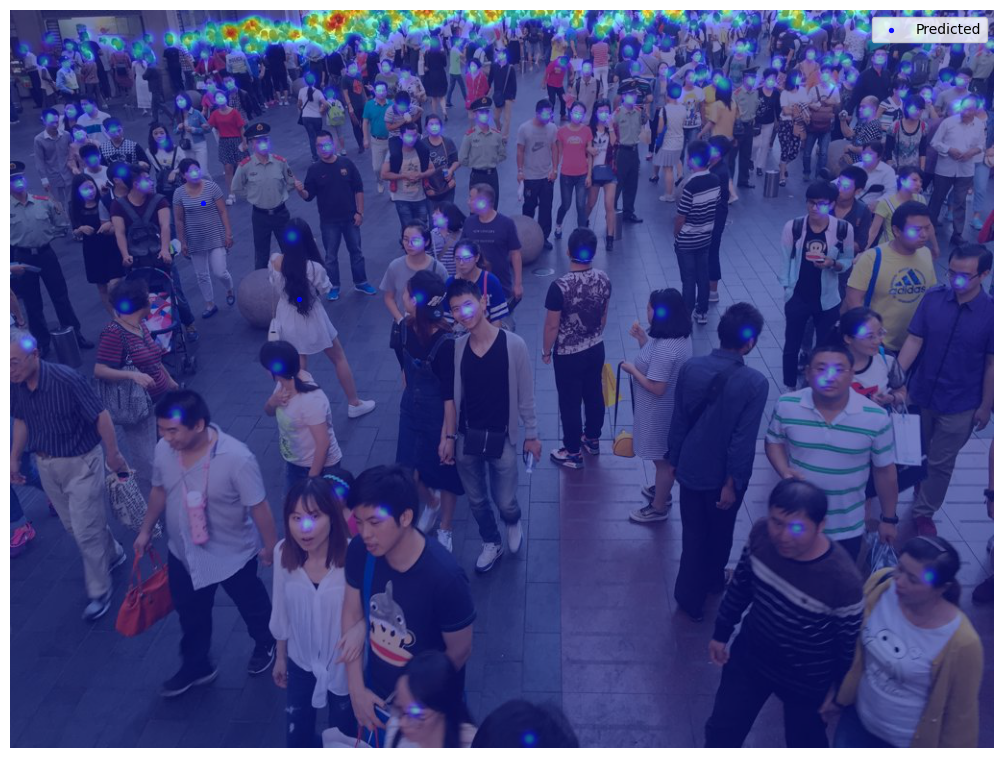

In [8]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

def create_density_map(centroids, img_size, sigma=5):
    """
    Create a density map from the given centroids.

    Parameters:
    - centroids: np.ndarray of shape (N, 2) where N is the number of points
    - img_size: tuple (height, width) of the image size
    - sigma: standard deviation for Gaussian kernel

    Returns:
    - density_map: np.ndarray of shape (height, width)
    """
    height, width = img_size
    density_map = np.zeros((height, width), dtype=np.float32)

    for centroid in centroids:
        x = int(round(centroid[0]))
        y = int(round(centroid[1]))
        if 0 <= x < width and 0 <= y < height:
            density_map[y, x] += 1

    # Smooth using Gaussian filter
    density_map = gaussian_filter(density_map, sigma=sigma)
    return density_map

def show_predicted(part, split, number, predicted_locations = np.array([[200, 200], [300, 300]]), plot_density_map=True):
    if part not in ['A', 'B']:
        raise ValueError("part must be either 'A' or 'B'")
    if split not in ['train', 'test']:
        raise ValueError("split must be either 'train' or 'test'")
    
    try:
        img = imread(f'../data/ShanghaiTech/part_{part}/{split}_data/images/IMG_{str(number)}.jpg')
        mat_data = scipy.io.loadmat(f'../data/ShanghaiTech/part_{part}/{split}_data/ground_truth/GT_IMG_{str(number)}.mat')
    except FileNotFoundError:
        print(f"File not found: ../data/ShanghaiTech/part_{part}/{split}_data/images/IMG_{str(number)}.jpg")
        return None
    
    locations = mat_data['image_info'][0, 0]['location'][0, 0]
    fig, ax = plt.subplots(figsize=(img.shape[1] / 100, img.shape[0] / 100), dpi=100)

    ax.imshow(img)
    ax.axis('off')

    if plot_density_map:
        density_map = create_density_map(locations, img.shape[:2])
        print(locations)
        ax.imshow(density_map, cmap='jet', alpha=0.5)
        print(f"Count: {np.sum(density_map)}")

    if predicted_locations is not None:
        plt.scatter(predicted_locations[:, 0], predicted_locations[:, 1], s=8, c='blue', alpha=0.9)
    #plt.scatter(locations[:, 0], locations[:, 1], s=3, c='red', alpha=0.7)
    plt.legend(['Predicted', 'Ground Truth'], loc='upper right')

    plt.tight_layout()
    plt.show()

show_predicted('B', 'train', 4, np.array([(200, 200), (300, 300)]))
